In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pandas as pd
import numpy as np
import path

In [4]:
project_path = "D:\Projects\SMS Spam\\"
data_path = "SMSSpamCollection.txt"
f = open(project_path + data_path, "r")

In [5]:
contents = f.read()

In [6]:
data = contents.split("\n")

In [7]:
msg = []
label = []

for d in data:
    try :
        _label, _msg = d.split("\t")
        msg.append(_msg)
        if _label == "ham":
            label.append(0)
        else:
            label.append(1)
    except Exception as e:
        print(e)

not enough values to unpack (expected 2, got 1)


In [8]:
print(len(msg))

5574


In [9]:
print(len(label))

5574


In [10]:
train_msg = []
test_msg = []
train_label = []
test_label = []

In [11]:
temp =  np.random.rand(5574) < 0.8

In [12]:
for i in range(temp.shape[0]):
    if temp[i] == True:
        train_msg.append(msg[i])
        train_label.append(label[i])
    else:
        test_msg.append(msg[i])
        test_label.append(label[i])

In [13]:
len(test_msg)
print(test_label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 

In [14]:
len(train_msg)

4457

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_msg)

In [16]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

7963


In [17]:
train_sequence = []
for _msg in train_msg:
    token_list = tokenizer.texts_to_sequences([_msg])[0]
    train_sequence.append(token_list)
    
test_sequence = []
for _msg in test_msg:
    token_list = tokenizer.texts_to_sequences([_msg])[0]
    test_sequence.append(token_list)

In [18]:
max_sequence_len = max([len(x) for x in train_sequence])

In [19]:
print(max_sequence_len)
print(train_sequence)

189
[[50, 403, 3864, 872, 680, 548, 63, 8, 1289, 81, 111, 343, 1290, 152, 2577, 1136, 68, 57, 3865, 139], [49, 356, 1682, 465, 6, 2021], [46, 466, 8, 18, 4, 720, 946, 2, 170, 1683, 1035, 769, 1684, 2022, 270, 2023, 71, 1683, 2, 1685, 2, 344, 466, 609, 873, 73, 381, 168, 641, 397, 2578], [6, 243, 154, 24, 404, 2579, 6, 140, 145, 59, 154], [721, 115, 68, 1686, 141, 107, 162, 2024, 21, 7, 34, 382, 88, 947, 56, 116, 383, 3, 44, 12, 14, 79, 2025, 49, 357, 873, 3866, 2, 67, 345, 244, 2, 2580], [72, 206, 13, 1291, 2026, 2027, 1687, 2028, 2029, 2030, 770, 126, 107, 681, 72, 13, 1036, 12, 47, 1688, 820, 405, 2, 1292, 13, 211, 1036], [722, 72, 4, 874, 398, 237, 3, 17, 107, 406, 2, 2581, 1442, 158, 875, 2, 128, 16, 2582, 128, 407, 2583, 467, 821, 549, 63], [131, 13, 95, 771, 1137, 26, 127, 6, 85, 1138, 2, 468, 2, 5, 323, 550, 772, 35, 358, 12, 46, 16, 5, 95, 468, 245, 46, 19, 2584], [28, 260, 38, 84, 212, 7, 1, 108, 69, 2, 282, 80, 40, 277, 1443, 207, 100, 208, 3867, 486, 90], [1689, 2585, 2, 170

In [20]:
train_sequence = np.array(pad_sequences(train_sequence, maxlen=max_sequence_len, padding='post'))
test_sequence = np.array(pad_sequences(test_sequence, maxlen=max_sequence_len, padding='post'))

train_label = np.array(train_label)
test_label = np.array(test_label)


In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 10, input_length = max_sequence_len))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 10)           79630     
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               24400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 104,131
Trainable params: 104,131
Non-trainable params: 0
_________________________________________________________________


In [23]:
# adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(train_sequence, train_label, epochs=5, verbose=1, validation_data=(test_sequence, test_label))

Epoch 1/5
140/140 [==============================] - 18s 127ms/step - loss: 0.2884 - accuracy: 0.9053 - val_loss: 0.0777 - val_accuracy: 0.9794
Epoch 2/5
140/140 [==============================] - 21s 149ms/step - loss: 0.0601 - accuracy: 0.9841 - val_loss: 0.0448 - val_accuracy: 0.9884
Epoch 3/5
140/140 [==============================] - 21s 148ms/step - loss: 0.0289 - accuracy: 0.9919 - val_loss: 0.0664 - val_accuracy: 0.9839
Epoch 4/5
140/140 [==============================] - 21s 148ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 5/5
140/140 [==============================] - 20s 145ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0404 - val_accuracy: 0.9893


In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

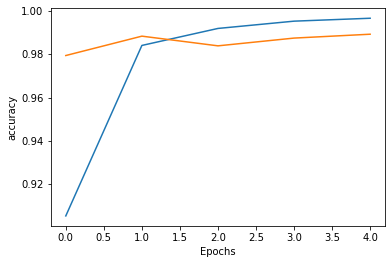

In [26]:
plot_graphs(history, 'accuracy')

In [27]:
model.save(project_path+'model.h5')

In [28]:
text = "Dear Candidate,We are pleased to invite to our live webinar on Careers in AI & Machine Learning, Today (15-July) @ 3 PM Register Now: bit.ly/2ODEe57"
tokenized_text = tokenizer.texts_to_sequences([text])[0]
tokenized_text = pad_sequences([tokenized_text], maxlen = max_sequence_len-1, padding='post')
tokenized_text = np.array(tokenized_text)
predicted = model.predict(tokenized_text, verbose=0)
if predicted > 0.5:
    print("Spam")
else:
    print("Not Spam")

Spam


In [29]:
import pickle

# saving
with open(project_path + 'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
i = 900
print(model.predict(test_sequence)[i])
print(test_label[i])

[0.00066227]
0
